In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [89]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error


In [91]:
df = pd.read_parquet('/workspaces/mle-zoomcamp-prj/project/src_data/green_tripdata_2024-01.parquet')

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [92]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.081905382194463

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


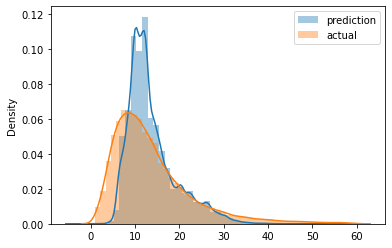

In [93]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [29]:
df_reading_Test.dtypes

FIPS                   float64
Admin2                  object
Province_State          object
Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed                int64
Deaths                   int64
Recovered                int64
Active                   int64
Combined_Key            object
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object

In [72]:
categorial = ['Country_Region']
numerical = ['Active']
df_reading_Test[numerical] = df_reading_Test[numerical].astype(str)

In [73]:
train_dicts = df_reading_Test[categorial + numerical].iloc[:10].to_dict(orient='records')

In [79]:
dv = DictVectorizer()
x_train = dv.fit_transform(train_dicts)

In [80]:
dv.feature_names_

['Active=1',
 'Active=13555',
 'Active=159599',
 'Active=23501',
 'Active=29740',
 'Active=4893',
 'Active=570',
 'Active=6',
 'Active=6017',
 'Active=8585',
 'Country_Region=Afghanistan',
 'Country_Region=Albania',
 'Country_Region=Algeria',
 'Country_Region=Andorra',
 'Country_Region=Angola',
 'Country_Region=Antigua and Barbuda',
 'Country_Region=Argentina',
 'Country_Region=Armenia',
 'Country_Region=Australia']

In [84]:
y_train=df_reading_Test['Incident_Rate'].values

In [85]:
y_train

array([ 134.89657831, 2026.40906248,  227.80986076, ...,    0.        ,
          0.        ,    0.        ])

In [86]:
lr = LinearRegression()
lr.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').